# Time series analysis

In [90]:
import pandas as pd
import matplotlib
import numpy as np
import statsmodels


In [91]:
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("statsmodels:", statsmodels.__version__)

pandas: 2.2.2
matplotlib: 3.10.0
numpy: 2.0.2
statsmodels: 0.14.5


# Data

import dataset: "data0.csv"

importazione del dataset : "data.csv"



In [92]:
df = pd.read_csv('data0.csv', sep = ";")

In [93]:
df.head()

,Unnamed: 0,0
0,2023-01-01,0.00
1,2023-01-02,-0.19
2,2023-01-03,1.07
3,2023-01-04,0.70
4,2023-01-05,1.42


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   0           1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [95]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors="coerce") # frist column as date
df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors="coerce") # second column ad value
df.columns = ["date", "value"] # column names)
df = df.set_index("date") # index

/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2025-09-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [97]:
df.head()

,value
date,
2023-01-01,0.00
2023-01-02,-0.19
2023-01-03,1.07
2023-01-04,0.70
2023-01-05,1.42


# Data plot

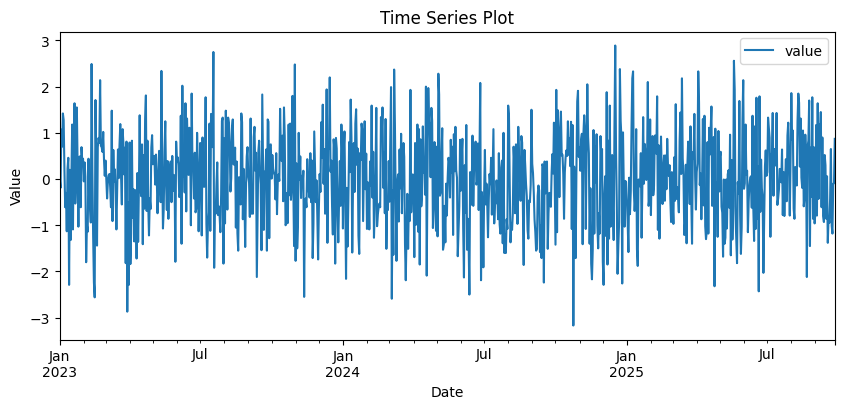

In [98]:

df.plot(figsize=(10,4))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot")
plt.show()



# Stationarity

ADF test

In [99]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['value'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.236686
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


The ADF test helps us assess whether the series is stationary. In this case, the test confirms stationarity.

Hypotheses:

H0 (null): the series has a unit root → not stationary.

H1 (alternative): the series is stationary.

Results:

ADF Statistic: -21.236686

p-value: 0.000000

Critical Values: -3.437 (1%), -2.864 (5%), -2.568 (10%)

Since the ADF statistic is much smaller (more negative) than all critical values and the p-value is far below standard significance levels (0.05 or 0.01), we reject the null hypothesis.

**Conclusion: The series is stationary.**

Il test ADF ci aiuta a valutare se la serie è stazionaria. Nel nostro caso, il test conferma che la serie è stazionaria.
Le ipotesi del test ADF sono:

- H0 (ipotesi nulla): la serie ha una radice unitaria → non è stazionaria.
- H1 (ipotesi alternativa): la serie è stazionaria.

I risultati del test sono:
- ADF Statistic: -21.236686
- p-value: 0.000000

Confrontando l'ADF Statistic (-21.236686) con i Critical Values (-3.437 al 1%, -2.864 al 5%, -2.568 al 10%), osserviamo che la statistica test è significativamente più piccola (più negativa) di tutti i valori critici.

Inoltre, il p-value (0.000000) è molto inferiore al livello di significatività comune (ad esempio, 0.05 o 0.01).

Poiché l'ADF Statistic è inferiore ai valori critici e il p-value è molto piccolo, rifiutiamo l'ipotesi nulla (H0). Concludiamo quindi che la serie è stazionaria.

# **ACF & PACF**

**Commentary on ACF and PACF plots:**

Most of the autocorrelation and partial autocorrelation values fall within the confidence bands, suggesting that the series is likely white noise.

**Commento sui grafici ACF e PACF:**

La maggior parte dei valori di autocorrelazione e autocorrelazione parziale rientrano nelle bande di confidenza, suggerendo che la serie è probabilmente rumore bianco.

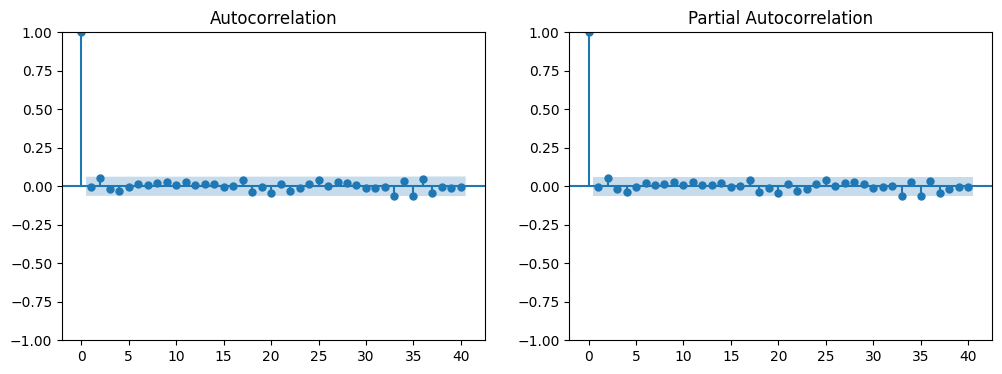

In [100]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['value'], lags=40, ax=axes[0])
plot_pacf(df['value'], lags=40, ax=axes[1])
plt.show()

# White noise


In [101]:
import statsmodels.api as sm

# Ljung-Box test
ljung_box_output = sm.tsa.acf(df['value'], qstat=True, nlags=40)

# Accessing qstat and pvalues based on the actual output structure
qstat = ljung_box_output[1]
pvalues = ljung_box_output[2]

# Interpret the results based on p-values
alpha = 0.05
print(f"\nInterpretation (at alpha = {alpha}):")
significant_lags = [i + 1 for i, p in enumerate(pvalues) if p < alpha]

if not significant_lags:
    print("Based on the Ljung-Box test, there is no significant evidence to reject the null hypothesis that the series is white noise for the tested lags.")
    print("This suggests the series is likely white noise.")
else:
    print(f"Based on the Ljung-Box test, there is significant evidence to reject the null hypothesis that the series is white noise at lags: {significant_lags}")
    print("This suggests the series is likely NOT white noise.")


Interpretation (at alpha = 0.05):
Based on the Ljung-Box test, there is no significant evidence to reject the null hypothesis that the series is white noise for the tested lags.
This suggests the series is likely white noise.


**Ljung-Box test:**

The Ljung-Box test results indicate that there is no significant evidence to reject the null hypothesis that the series is white noise, supporting the conclusion from the ACF and PACF plots.

**Test di Ljung-Box:**

I risultati del test di Ljung-Box indicano che non c'è una significativa evidenza per rifiutare l'ipotesi nulla che la serie sia rumore bianco, supportando la conclusione dai grafici ACF e PACF.